# **Library**

In [1]:
!pip install us

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 7.6 MB/s eta 0:00:00


In [2]:
!pip install geopy folium plotly

In [3]:
!pip install squarify

In [4]:
pip install imbalanced-learn

In [5]:
pip install lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.9 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker
import us
from statsmodels.tsa.seasonal import seasonal_decompose
import folium
import geopy
import squarify
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from datetime import date
import re
from IPython.display import display
import joblib
from google.colab import files

#Model Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#Sampling & Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from tempfile import mkdtemp
from shutil import rmtree

#Validasi
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, fbeta_score

# Import Data

In [7]:
import gdown

files = {
    "1ToxyBWEcCNKcHELd8VgE8xivKdkGHmzl": "data_train.csv",
    "11ya-ed7WGHKQ1iFHvxnkN_ikY3zafkHX": "data_test.csv"
}

for file_id, output in files.items():
    gdown.download(id=file_id, output=output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1ToxyBWEcCNKcHELd8VgE8xivKdkGHmzl
From (redirected): https://drive.google.com/uc?id=1ToxyBWEcCNKcHELd8VgE8xivKdkGHmzl&confirm=t&uuid=bf73dd6d-cd39-41b5-9a1e-f8cf21dbc3ae
To: /content/data_train.csv
100%|██████████| 351M/351M [00:03<00:00, 94.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=11ya-ed7WGHKQ1iFHvxnkN_ikY3zafkHX
From (redirected): https://drive.google.com/uc?id=11ya-ed7WGHKQ1iFHvxnkN_ikY3zafkHX&confirm=t&uuid=ef754d5a-f0fa-4a2e-afbd-ded16f18c99e
To: /content/data_test.csv
100%|██████████| 150M/150M [00:02<00:00, 61.2MB/s]


In [8]:
df_train = pd.read_csv('data_train.csv')
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
df_test = pd.read_csv('data_test.csv')
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [12]:
print("\nStatistik Deskriptif:")
df_train.describe()


Statistik Deskriptif:


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## Data Cleaning

In [13]:
index_collum_train = df_train['Unnamed: 0']
index_collum_test = df_test['Unnamed: 0']
TransNum_collum_train = df_train['trans_num']
TransNum_collum_test = df_test['trans_num']
first_name_collum_train = df_train['first']
first_name_collum_test = df_test['first']
last_name_collum_train = df_train['last']
last_name_collum_test = df_test['last']
street_name_collum_train = df_train['street']
street_name_collum_test = df_test['street']
zip_collum_train = df_train['zip']
zip_collum_test = df_test['zip']
cc_num_collum_train = df_train['cc_num']
cc_num_collum_test = df_test['cc_num']
df_train.drop(columns=['Unnamed: 0','trans_num','first','last','street','zip','cc_num'], inplace=True)
df_test.drop(columns=['Unnamed: 0','trans_num','first','last','street','zip','cc_num'], inplace=True)

In [14]:
print("\nNumber of Missing Values in each column in df_train:")
df_train.isnull().sum()


Number of Missing Values in each column in df_train:


,0
trans_date_trans_time,0
merchant,0
category,0
amt,0
gender,0
city,0
state,0
lat,0
long,0
city_pop,0


In [15]:
print("\nNumber of Missing Values in each column in the df_test:")
df_test.isnull().sum()


Number of Missing Values in each column in the df_test:


,0
trans_date_trans_time,0
merchant,0
category,0
amt,0
gender,0
city,0
state,0
lat,0
long,0
city_pop,0


In [16]:
exact_dupes_train = df_train.duplicated().sum()
print(f"Number of exact duplicates data train: {exact_dupes_train}")

exact_dupes_test = df_test.duplicated().sum()
print(f"Number of exact duplicates data test: {exact_dupes_test}")

Number of exact duplicates data train: 0
Number of exact duplicates data test: 0


In [17]:
df_train.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


#**EDA**

## Target Analysis

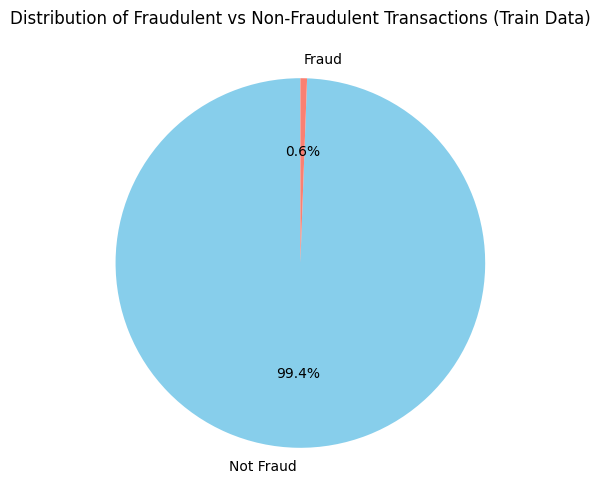

In [18]:
fraud_counts = df_train['is_fraud'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions (Train Data)')
plt.show()

/tmp/ipython-input-3289298144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_train, x='is_fraud', y='amt', palette=['skyblue', 'salmon'])


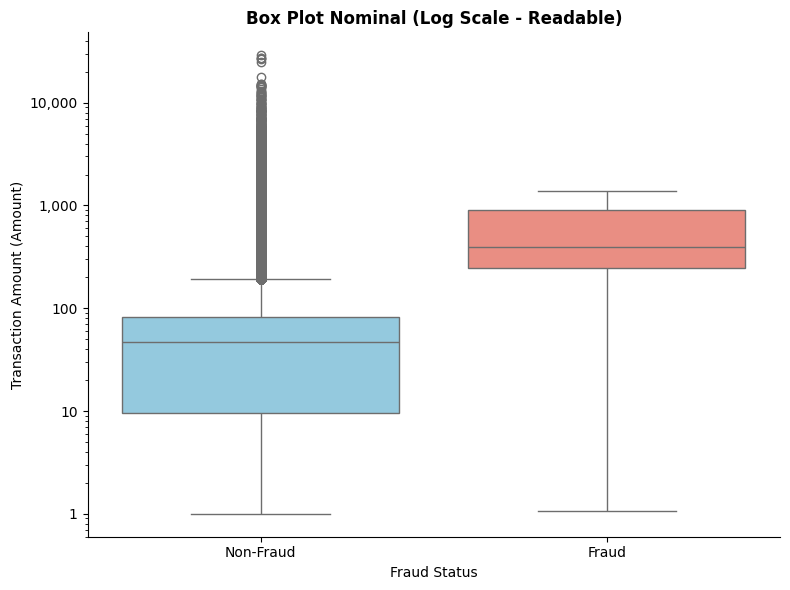

In [19]:
plt.figure(figsize=(8, 6))

# Creating a Box Plot
ax = sns.boxplot(data=df_train, x='is_fraud', y='amt', palette=['skyblue', 'salmon'])

# 1. Log Scale Set
ax.set_yscale('log')

# 2. Y-AXIS LABEL FORMAT CORRECTION
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

# Optional: Add a comma as a thousands separator (e.g., 10,000)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.title('Box Plot Nominal (Log Scale - Readable)', fontweight='bold')
plt.xlabel('Fraud Status')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.ylabel('Transaction Amount (Amount)')

sns.despine()
plt.tight_layout()
plt.show()

## Transaction & Time Analysis

Column:

trans_date_trans_time

unix_time

Analysis:

Transaction time (hour)

Day of the week

Month

Fraud patterns based on time (night vs. day, weekday vs. weekend)

Spikes in fraud at certain times

In [20]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train['year'] = df_train['trans_date_trans_time'].dt.year
df_train['month'] = df_train['trans_date_trans_time'].dt.month_name()
df_train['day'] = df_train['trans_date_trans_time'].dt.day_name()
df_train['hour'] = df_train['trans_date_trans_time'].dt.hour
df_train['time category'] = df_train['hour'].apply(lambda x: 'Night' if 0 <= x <= 6 else ('Morning' if 7 <= x <= 12 else ('Afternoon' if 13 <= x <= 18 else 'Evening')))
df_train['day category'] = df_train['day'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')

/tmp/ipython-input-1495437776.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_col, y='Fraud Rate (%)', data=stats, palette='viridis')


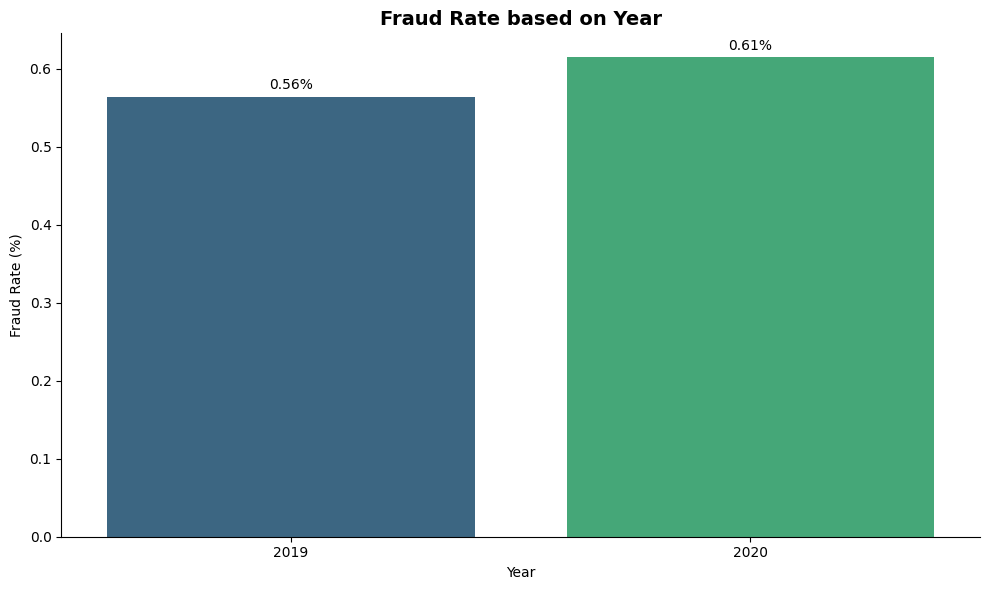

/tmp/ipython-input-1495437776.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_col, y='Fraud Rate (%)', data=stats, palette='viridis')


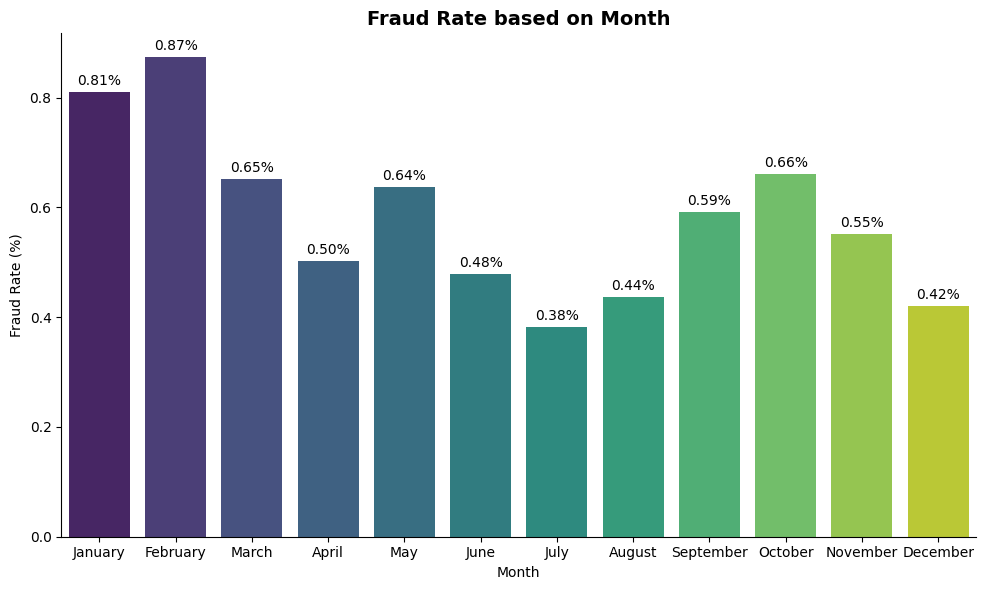

/tmp/ipython-input-1495437776.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_col, y='Fraud Rate (%)', data=stats, palette='viridis')


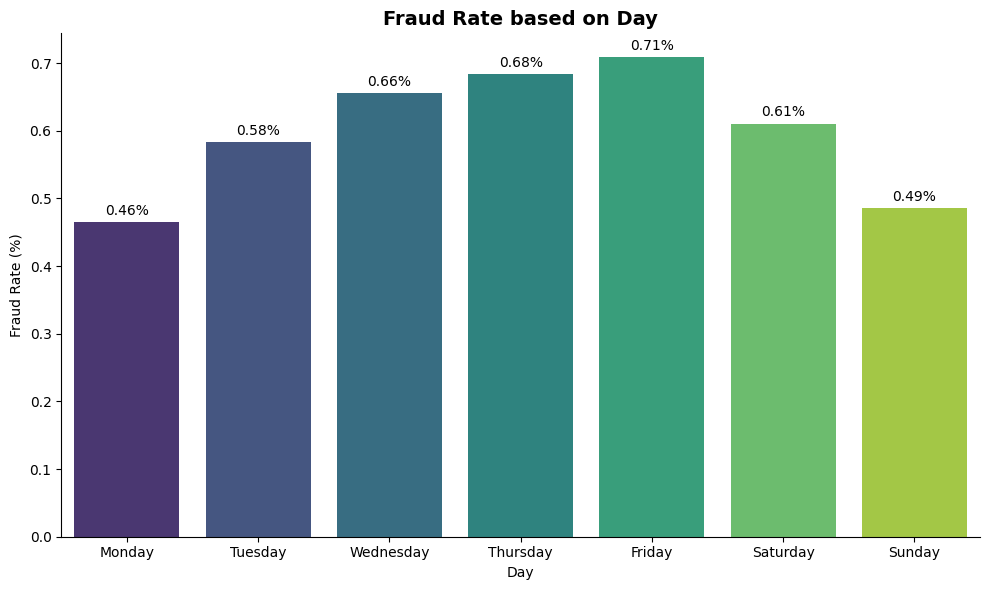

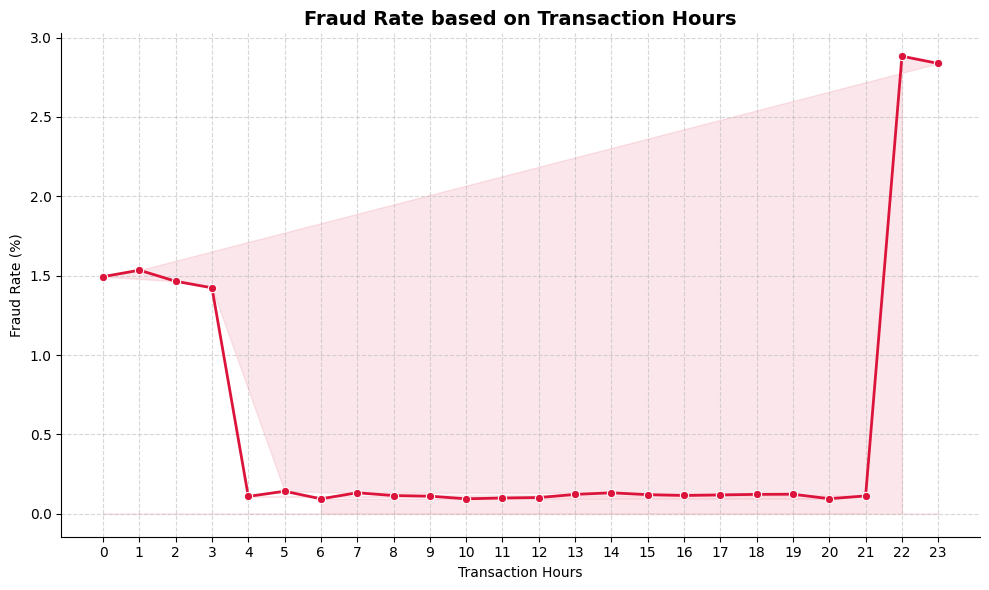

/tmp/ipython-input-1495437776.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_col, y='Fraud Rate (%)', data=stats, palette='viridis')


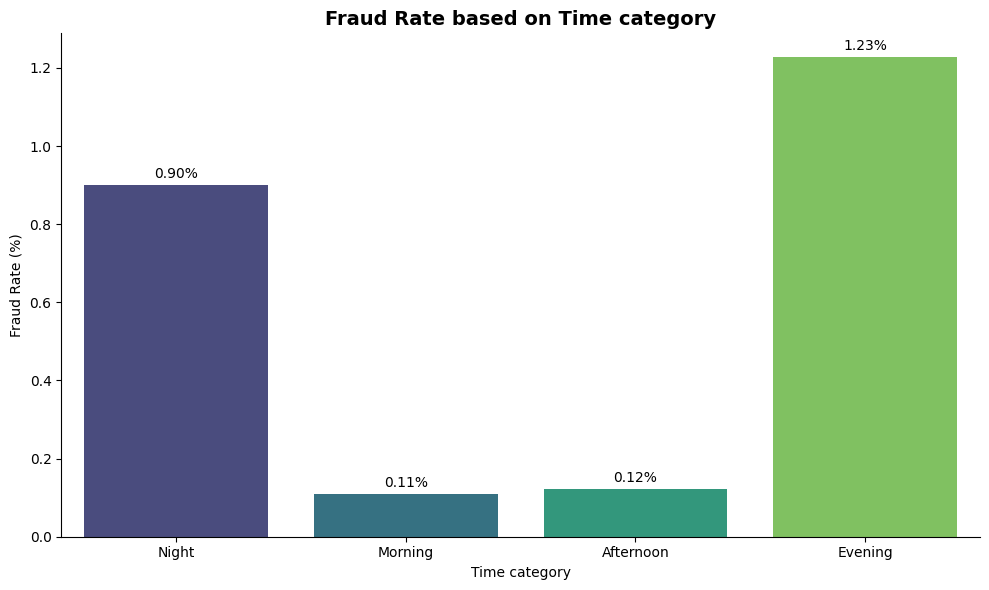

/tmp/ipython-input-1495437776.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_col, y='Fraud Rate (%)', data=stats, palette='viridis')


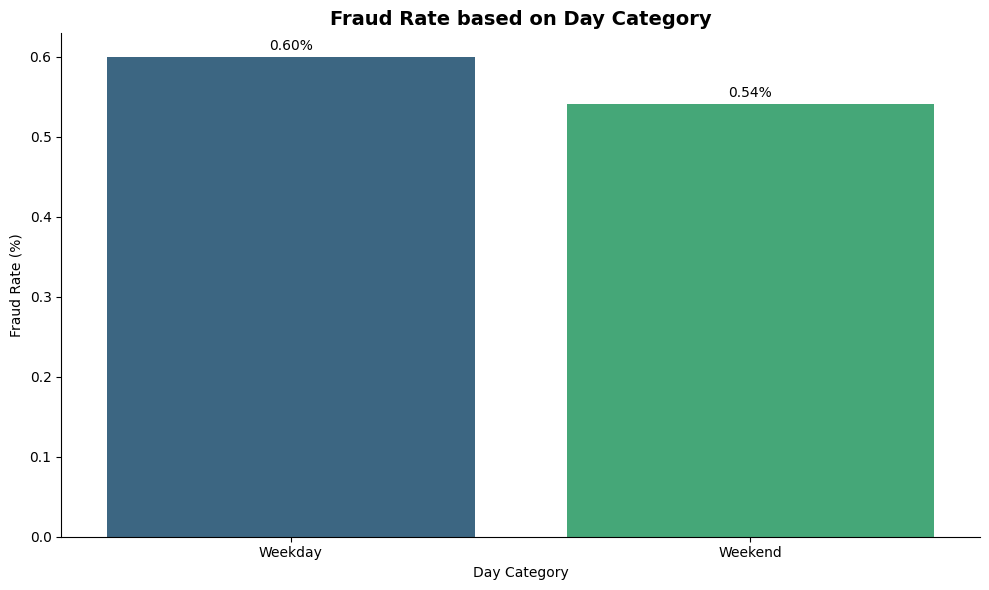

In [21]:
from pandas.core.indexes import category
def data_visualization(data, x_col, title, top_n=None, figsize=(10, 6)):
  """
  Functions to calculate fraud rates and create data visualizations.
  Use bar plots for discrete categories such as hours, days, months, and years.
  """
  # Aggregation: Calculate the Number of Transactions (count) and Number of Fraudulent Transactions (sum)
  stats = data.groupby(x_col)['is_fraud'].agg(['count', 'sum']).reset_index()
  stats.rename(columns={'sum': 'fraud_count', 'count': 'total_transactions'}, inplace=True)

  # Calculate Fraud Rate (%)
  # Add handling to avoid division by zero
  stats['Fraud Rate (%)'] = (stats['fraud_count'] / stats['total_transactions']) * 100
  stats.loc[stats['total_transactions'] == 0, 'Fraud Rate (%)'] = 0 # Set rate to 0 if no transactions


  # Add sorting logic for month and day
  if x_col == 'month':
      month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
      stats[x_col] = pd.Categorical(stats[x_col], categories=month_order, ordered=True)
      stats = stats.sort_values(x_col)
  elif x_col == 'day':
      day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
      stats[x_col] = pd.Categorical(stats[x_col], categories=day_order, ordered=True)
      stats = stats.sort_values(x_col)
  elif x_col == 'time category':
      category_order = ['Night', 'Morning', 'Afternoon', 'Evening']
      stats[x_col] = pd.Categorical(stats[x_col], categories=category_order, ordered=True)
      stats = stats.sort_values(x_col)
  else:
      stats = stats.sort_values(by='Fraud Rate (%)', ascending=False).reset_index(drop=True)

  plt.figure(figsize=figsize)
  if x_col == 'hour':
    sns.lineplot(x=x_col, y='Fraud Rate (%)', data=stats, marker='o', color='crimson',linewidth = 2)
    plt.fill_between(stats[x_col], stats['Fraud Rate (%)'], color='crimson', alpha=0.1)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(range(0, 24))
  else:
    ax = sns.barplot(x=x_col, y='Fraud Rate (%)', data=stats, palette='viridis')
    # Number Label
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%', padding=3)

  plt.title(f'Fraud Rate based on {title}', fontsize=14, fontweight='bold')
  plt.xlabel(title)
  plt.ylabel('Fraud Rate (%)')
  sns.despine()
  plt.tight_layout()
  plt.show()

data_visualization(df_train, 'year', 'Year')
data_visualization(df_train, 'month', 'Month')
data_visualization(df_train, 'day', 'Day')
data_visualization(df_train, 'hour', 'Transaction Hours')
data_visualization(df_train, 'time category', 'Time category')
data_visualization(df_train, 'day category', 'Day Category')

**Tambahan**

In [22]:
daily_fraud = df_train.set_index('trans_date_trans_time').resample('D')['is_fraud'].sum()

In [23]:
daily_fraud.fillna(0)
daily_fraud.head(10)

,is_fraud
trans_date_trans_time,
2019-01-01,0
2019-01-02,7
2019-01-03,12
2019-01-04,13
2019-01-05,13
2019-01-06,2
2019-01-07,4
2019-01-08,26
2019-01-09,23


In [24]:
decomposition = seasonal_decompose(daily_fraud, model='additive', period=7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

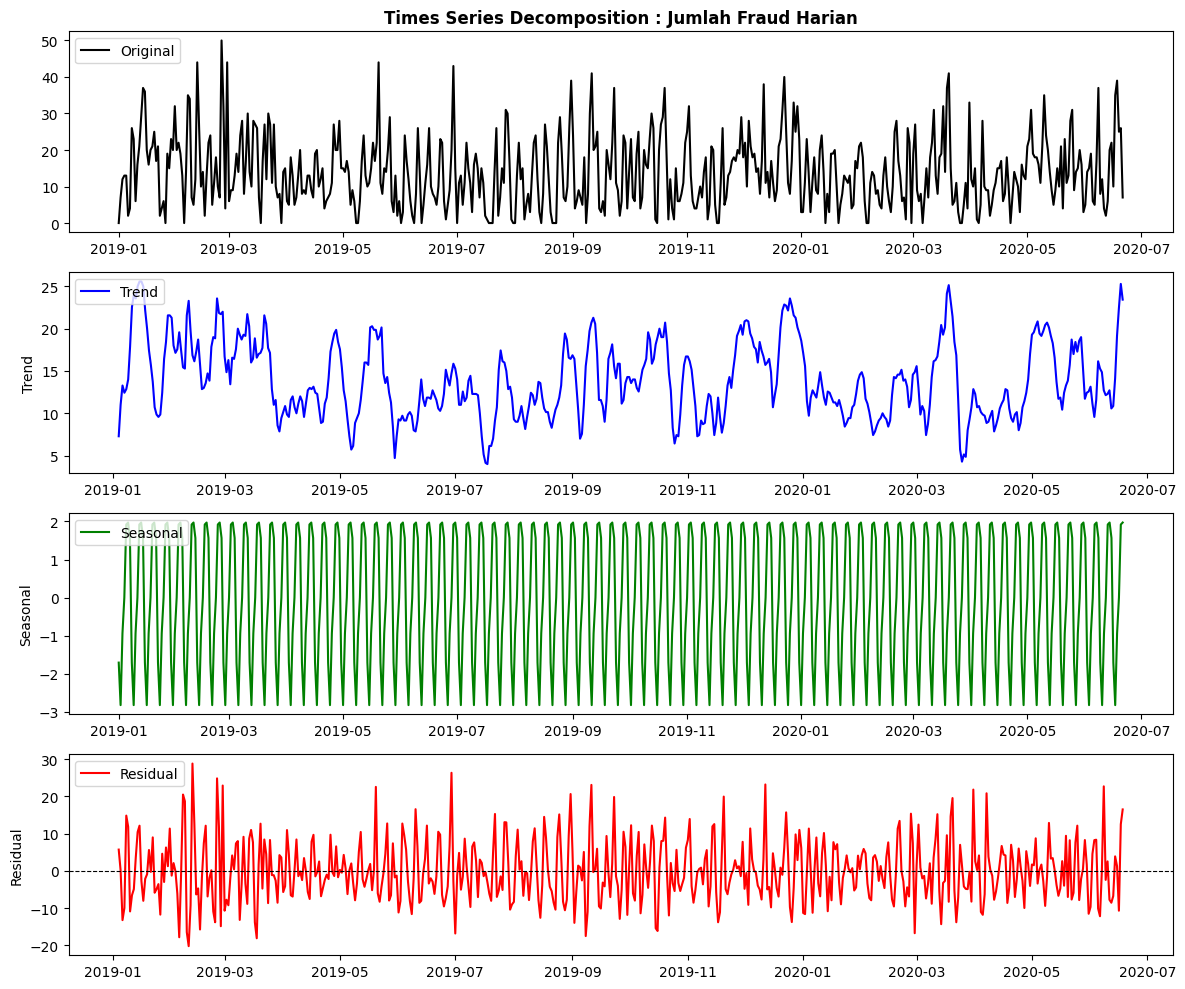

In [25]:
plt.figure(figsize = (12,10))

#1. Original
plt.subplot(411)
plt.plot(daily_fraud, label='Original', color = 'black')
plt.legend(loc='upper left')
plt.title('Times Series Decomposition : Jumlah Fraud Harian', fontweight='bold')

#2. Trend
plt.subplot(412)
plt.plot(trend, label='Trend', color = 'blue')
plt.legend(loc='upper left')
plt.ylabel('Trend')

#3. Seasonal
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color = 'green')
plt.legend(loc='upper left')
plt.ylabel('Seasonal')

#4. Residual
plt.subplot(414)
plt.plot(residual, label='Residual', color = 'red')
plt.legend(loc='upper left')
plt.ylabel('Residual')

plt.axhline(y=0,color='black',linestyle = '--', linewidth=0.8)

plt.tight_layout()
plt.show()

## Transaction Nominal Analysis

Distribution of amounts (skewed/outlier)

Boxplot of fraud vs. non-fraud

Average and median transaction amounts for fraud

Does fraud often occur at extreme nominal values?



In [26]:
print("Fraud vs. Non-Fraud Transaction Statistics")
stats = df_train.groupby('is_fraud')['amt'].describe()
stats

Fraud vs. Non-Fraud Transaction Statistics


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289169.0,67.667110,154.007971,1.00,9.6100,47.280,82.540,28948.90
1,7506.0,531.320092,390.560070,1.06,245.6625,396.505,900.875,1376.04


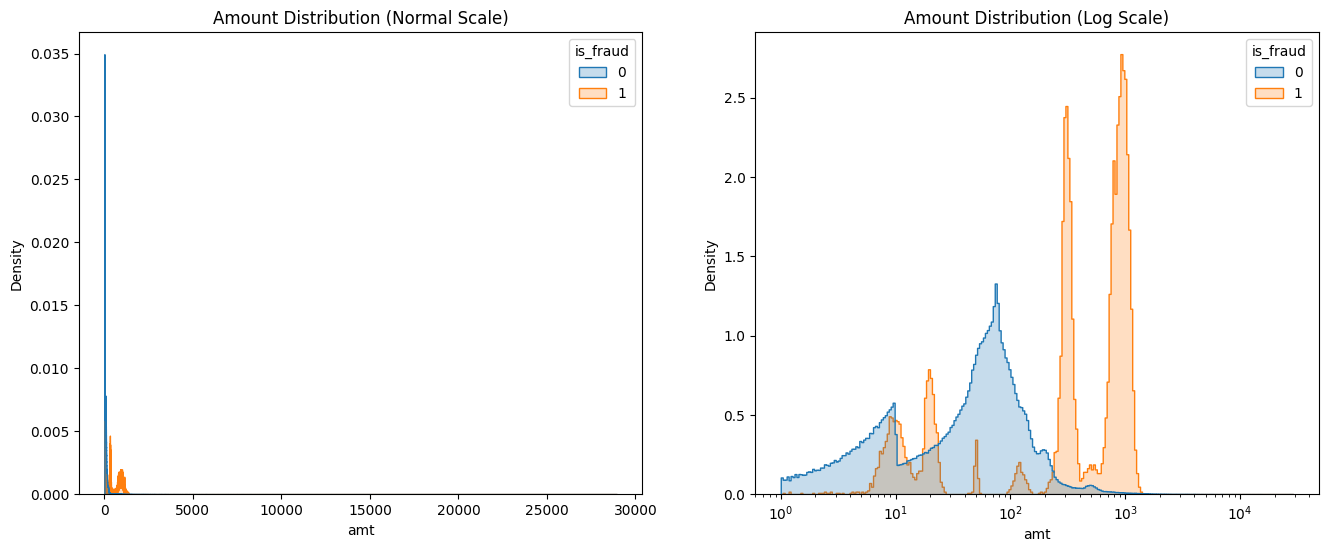

In [27]:
fig, axes = plt.subplots(1,2,figsize=(16, 6))
sns.histplot(data=df_train, x = 'amt', hue = 'is_fraud', element = 'step', stat='density',common_norm=False,ax=axes[0])
axes[0].set_title('Amount Distribution (Normal Scale)')

sns.histplot(data=df_train, x = 'amt', hue = 'is_fraud', element = 'step', stat='density',common_norm=False,log_scale=True,ax=axes[1])
axes[1].set_title('Amount Distribution (Log Scale)')
plt.show()

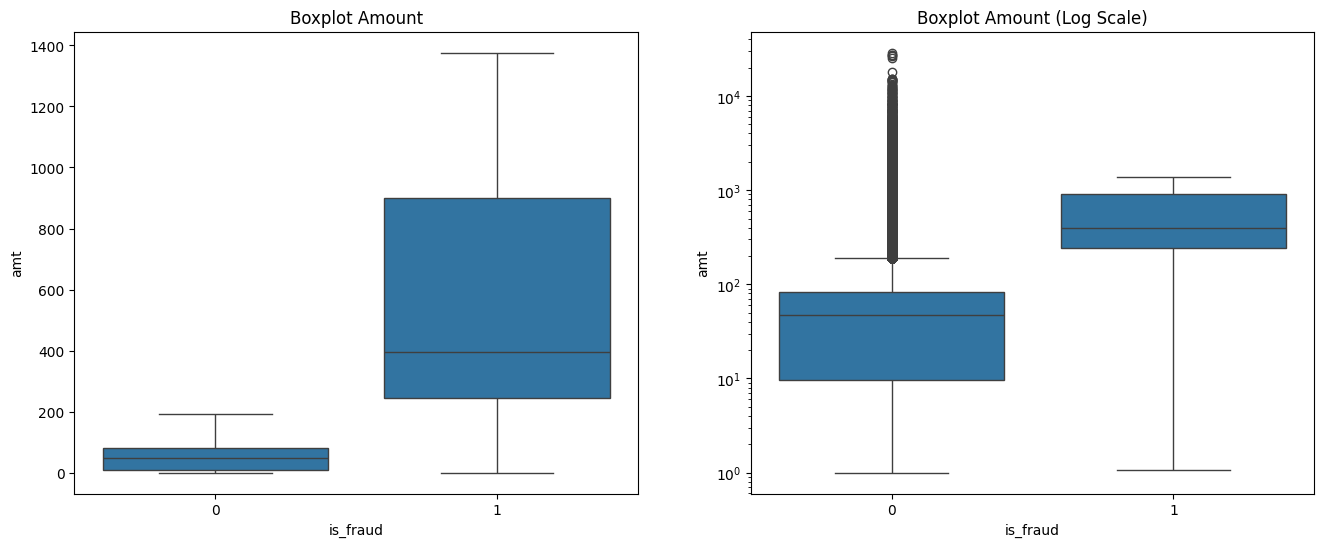

In [28]:
fig, axes = plt.subplots(1,2,figsize=(16, 6))
sns.boxplot(data=df_train, x = 'is_fraud', y = 'amt',showfliers = False, ax=axes[0])
axes[0].set_title('Boxplot Amount')

sns.boxplot(data=df_train, x = 'is_fraud', y = 'amt', ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Boxplot Amount (Log Scale)')
plt.show()

**Addition**

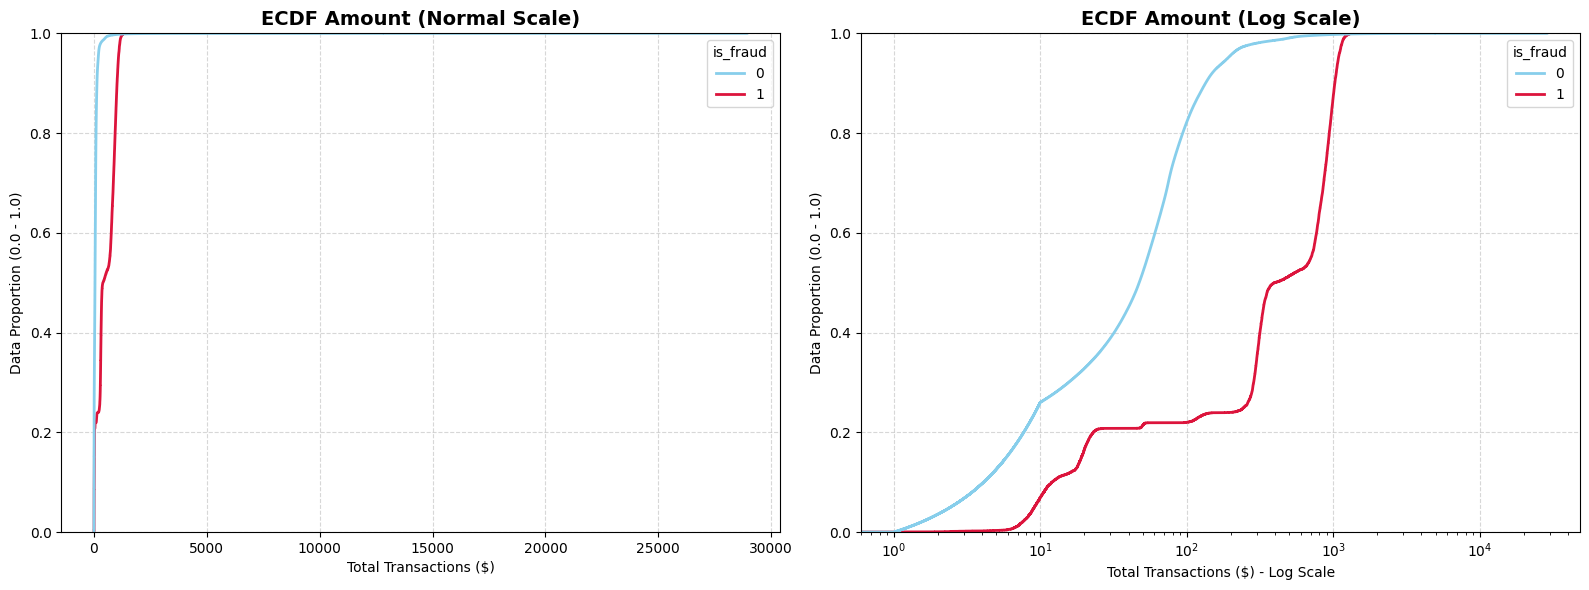

In [29]:
def plot_ecdf_amount(data):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # --- Plot 1: Normal Scale (Linear) ---
    sns.ecdfplot(data=data, x="amt", hue="is_fraud", palette={0: 'skyblue', 1: 'crimson'}, ax=axes[0], linewidth=2)
    axes[0].set_title('ECDF Amount (Normal Scale)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Total Transactions ($)')
    axes[0].set_ylabel('Data Proportion (0.0 - 1.0)')
    axes[0].grid(True, linestyle='--', alpha=0.5)

    # --- Plot 2: Logarithmic Scale (Highly Recommended for Money) ---
    # Log scale helps to see the difference between small and large numbers
    sns.ecdfplot(data=data, x="amt", hue="is_fraud", palette={0: 'skyblue', 1: 'crimson'}, ax=axes[1], linewidth=2)
    axes[1].set_xscale('log') # Changing the X-axis to logarithmic
    axes[1].set_title('ECDF Amount (Log Scale)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Total Transactions ($) - Log Scale')
    axes[1].set_ylabel('Data Proportion (0.0 - 1.0)')
    axes[1].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

plot_ecdf_amount(df_train)

## Customer Demographic Analysis

Columns:

gender

job

dob → age

city_pop

Analysis:

Fraud rate based on gender

Fraud based on age group

Relationship between city population and fraud (urban vs rural)

In [30]:
df_train['dob'] = pd.to_datetime(df_train['dob'])

In [31]:
df_train['age'] = (df_train['trans_date_trans_time'] - df_train['dob']).dt.days //365

In [32]:
bins = [0,25,40,60,100]
labels = ['<25','26 - 40', '41 - 60', '>60']
df_train['age_category'] = pd.cut(df_train['age'], bins = bins, labels = labels)

In [33]:
df_train['population_category'] = df_train['city_pop'].apply(lambda x: 'Urban' if x > 50000 else 'Rural')

In [34]:
job_fraud = df_train.groupby('job')['is_fraud'].agg(['mean','count']).reset_index()
top_10_job = job_fraud[job_fraud['count'] > 50].sort_values(by='mean', ascending=False).head(10)

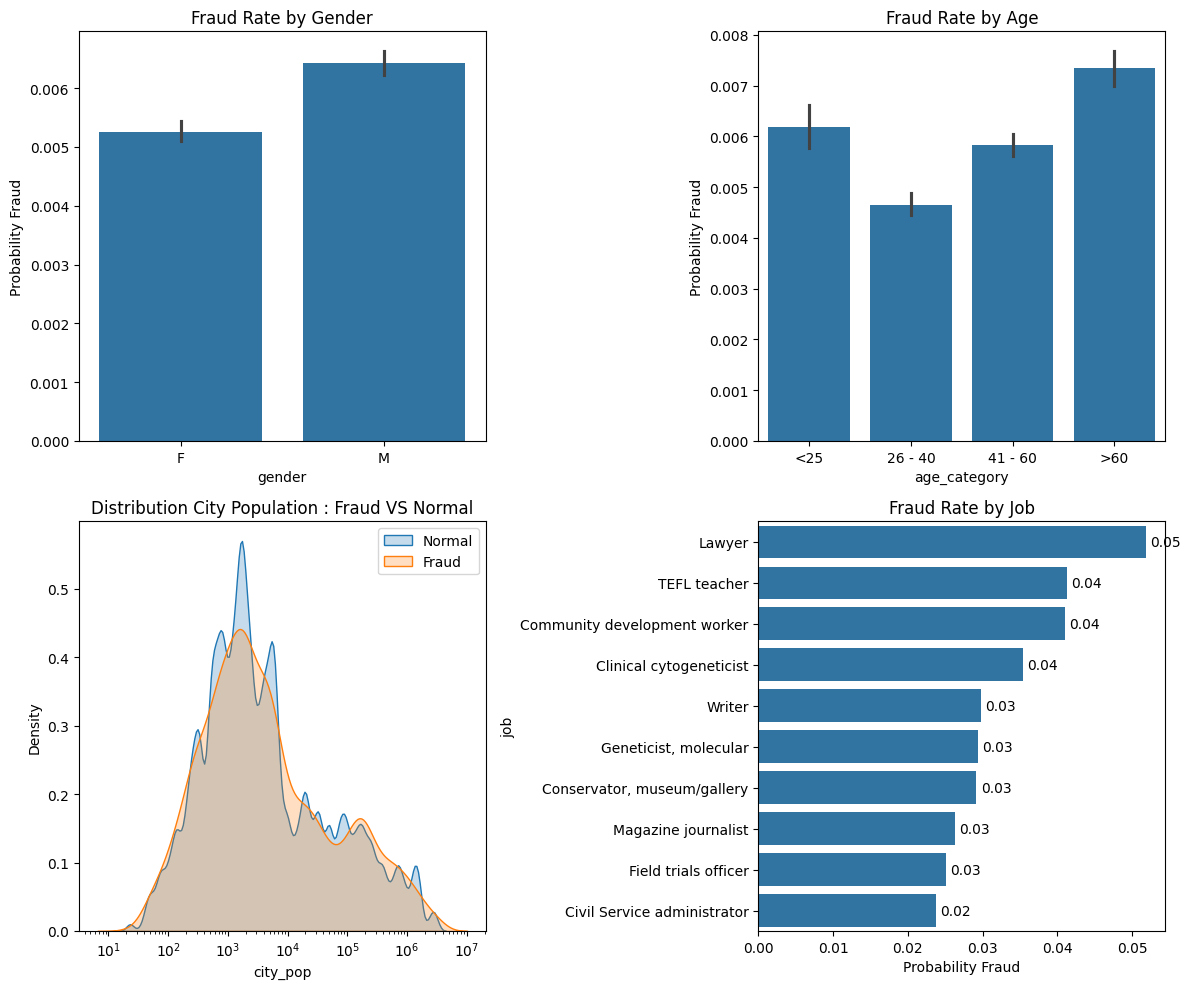

In [35]:
fig, axes = plt.subplots(2,2 ,figsize=(12,10))
sns.barplot(data=df_train,x='gender',y='is_fraud',ax=axes[0,0])
axes[0,0].set_title('Fraud Rate by Gender')
axes[0,0].set_ylabel('Probability Fraud')

sns.barplot(data=df_train,x='age_category',y='is_fraud',ax=axes[0,1])
axes[0,1].set_title('Fraud Rate by Age')
axes[0,1].set_ylabel('Probability Fraud')

sns.kdeplot(data=df_train[df_train['is_fraud']==0],x='city_pop',log_scale=True,label='Normal',ax=axes[1,0],fill=True)
sns.kdeplot(data=df_train[df_train['is_fraud']==1],x='city_pop',log_scale=True,label='Fraud',ax=axes[1,0],fill=True)
axes[1,0].set_title('Distribution City Population : Fraud VS Normal')
axes[1,0].legend()

sns.barplot(data=top_10_job,x='mean',y='job',ax=axes[1,1])
axes[1,1].set_title('Fraud Rate by Job')
axes[1,1].set_xlabel('Probability Fraud')
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

**Addition**

/tmp/ipython-input-861236755.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  fraud_heatmap = df_train.pivot_table(index='age_category',columns = 'gender',values = 'is_fraud',aggfunc = 'mean') * 100


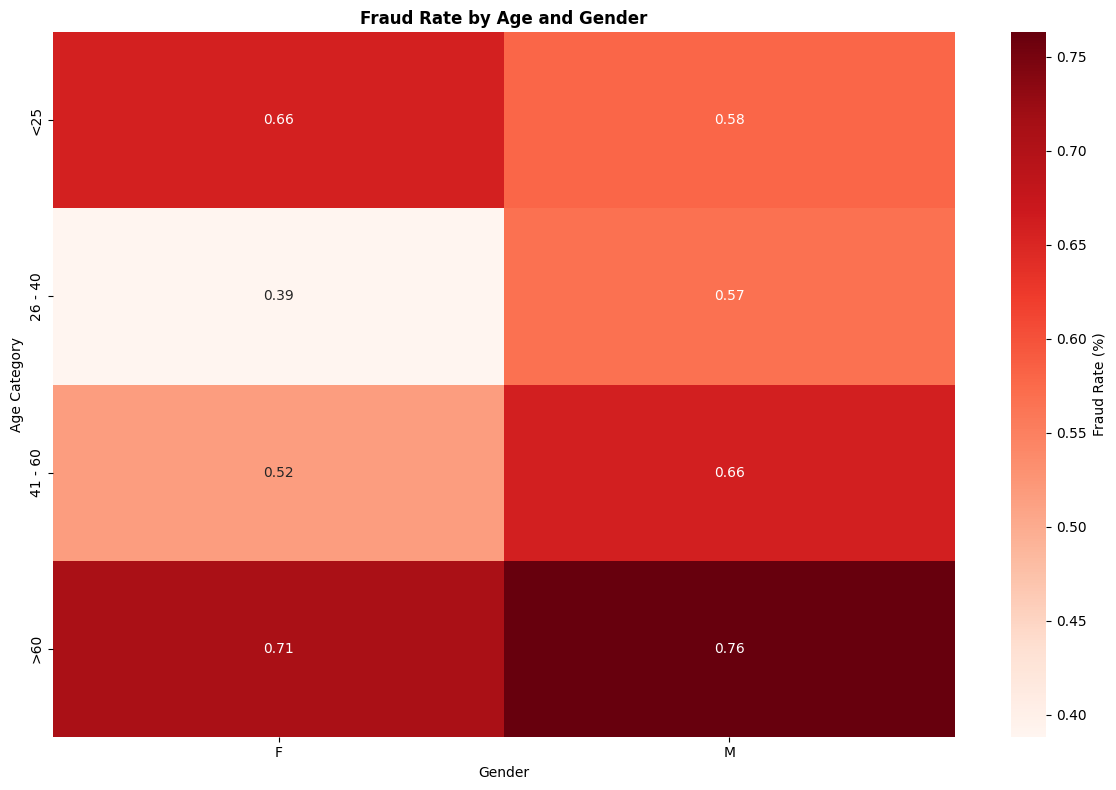

In [36]:
fraud_heatmap = df_train.pivot_table(index='age_category',columns = 'gender',values = 'is_fraud',aggfunc = 'mean') * 100
plt.figure(figsize=(12,8))
sns.heatmap(fraud_heatmap, annot=True, fmt=".2f", cmap='Reds', cbar_kws={'label': 'Fraud Rate (%)'})
plt.title('Fraud Rate by Age and Gender', fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Age Category')
plt.tight_layout()
plt.show()

## Spatial Analysis

Columns:

lat, long

merch_lat, merch_long

city, state, zip

Analysis:

Distance between customer and merchant locations

Fraud in cross-city/cross-state transactions

Location outliers (merchants far from customer locations)

Important features:

distance customer ↔ merchant

In [37]:
def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371 # Earth's radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return r * c
df_train['distance_KM'] = haversine_distance(df_train['lat'],df_train['long'],df_train['merch_lat'],df_train['merch_long'])

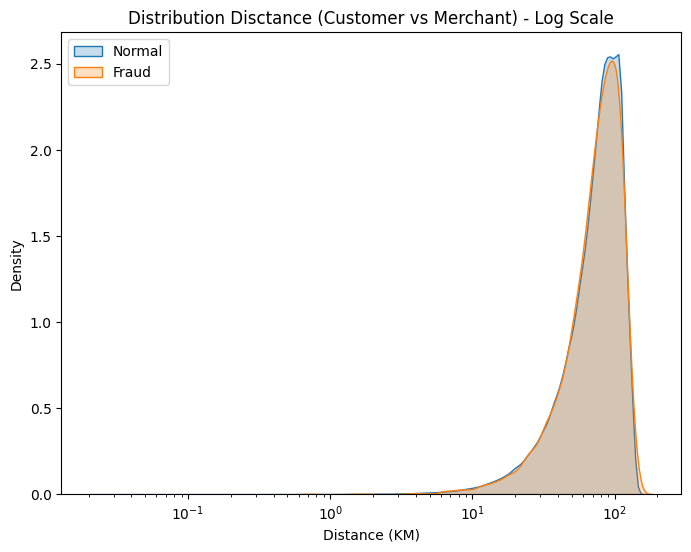

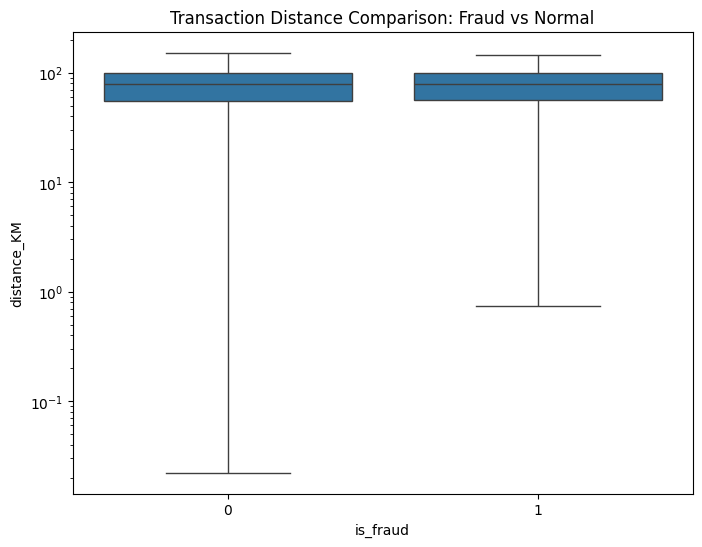

In [38]:
plt.figure(figsize = (8,6))
sns.kdeplot(data=df_train[df_train['is_fraud']==0], x='distance_KM', log_scale=True, label='Normal', fill=True)
sns.kdeplot(data=df_train[df_train['is_fraud']==1], x='distance_KM', log_scale=True, label='Fraud', fill=True)

plt.title('Distribution Disctance (Customer vs Merchant) - Log Scale')
plt.xlabel('Distance (KM)')
plt.legend()
plt.show()

# --- 3. BOXPLOT OUTLIER VISUALIZATION ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='distance_KM', data=df_train)
plt.yscale('log') # Log scale so that outliers are clearly visible
plt.title('Transaction Distance Comparison: Fraud vs Normal')
plt.show()

In [39]:
# --- 4. VISUALISASI PETA (FOLIUM) ---
fraud_map = folium.Map(location=[df_train['lat'].mean(), df_train['long'].mean()], zoom_start=4)

# Ambil sampel data fraud
fraud_data = df_train[df_train['is_fraud'] == 1].head(500)

for idx, row in fraud_data.iterrows():
    # Titik Customer (Biru)
    folium.CircleMarker([row['lat'], row['long']], radius=3, color='blue', fill=True).add_to(fraud_map)
    # Titik Merchant (Merah)
    folium.CircleMarker([row['merch_lat'], row['merch_long']], radius=3, color='red', fill=True).add_to(fraud_map)
    # Garis Hubung
    folium.PolyLine([[row['lat'], row['long']], [row['merch_lat'], row['merch_long']]], color="red", weight=1, opacity=0.5).add_to(fraud_map)

fraud_map

## Merchant Analysis

Column:

merchant

category

Analysis:

Merchants with high fraud rates

Merchant categories most prone to fraud

Concentration of fraud in specific merchants

In [40]:
# --- 1. PREPROCESSING ---
# Clean up merchant names (remove the prefix “fraud_” if present)
df_train['merchant_clean'] = df_train['merchant'].str.replace('fraud_', '', regex=False)

# --- 2. CATEGORY ANALYSIS ---
cat_stats = df_train.groupby('category')['is_fraud'].agg(['mean', 'count', 'sum']).reset_index()
cat_stats.columns = ['Category', 'Fraud_Rate', 'Total_Trans', 'Total_Fraud_Cases']
# Sort by highest Fraud Rate
cat_stats = cat_stats.sort_values(by='Fraud_Rate', ascending=False)

# --- 3. MERCHANT ANALYSIS (WITH FILTER) ---
merch_stats = df_train.groupby('merchant_clean')['is_fraud'].agg(['mean', 'count', 'sum']).reset_index()
merch_stats.columns = ['Merchant', 'Fraud_Rate', 'Total_Trans', 'Total_Fraud_Cases']

# Filter: Only include merchants with at least 50 transactions to ensure valid statistics.
top_risky_merchants = merch_stats[merch_stats['Total_Trans'] > 50].sort_values(by='Fraud_Rate', ascending=False).head(10)

/tmp/ipython-input-2419428831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_stats, y='Category', x='Fraud_Rate', ax=axes[0], palette='Reds_r')
/tmp/ipython-input-2419428831.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_risky_merchants, y='Merchant', x='Fraud_Rate', ax=axes[1], palette='Dark2')


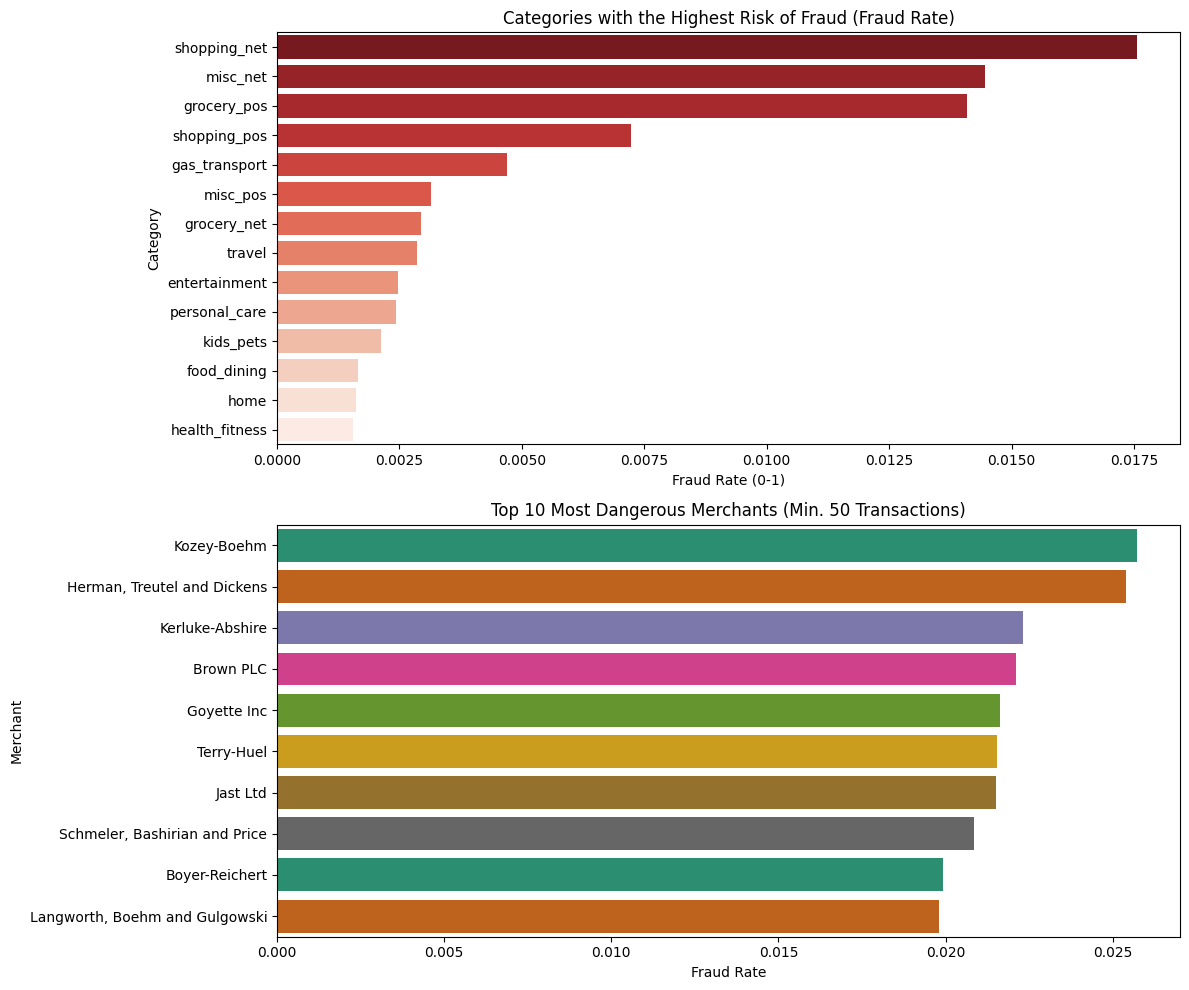

In [41]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot A: Fraud Rate by Category
sns.barplot(data=cat_stats, y='Category', x='Fraud_Rate', ax=axes[0], palette='Reds_r')
axes[0].set_title('Categories with the Highest Risk of Fraud (Fraud Rate)')
axes[0].set_xlabel('Fraud Rate (0-1)')

# Plot B: Top 10 Most Dangerous Merchants (Min. 50 Transactions)
sns.barplot(data=top_risky_merchants, y='Merchant', x='Fraud_Rate', ax=axes[1], palette='Dark2')
axes[1].set_title('Top 10 Most Dangerous Merchants (Min. 50 Transactions)')
axes[1].set_xlabel('Fraud Rate')

plt.tight_layout()
plt.show()

# **Preprocessing**

In [42]:
df_train.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,...,month,day,hour,time category,day category,age,age_category,population_category,distance_KM,merchant_clean
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,...,January,Tuesday,0,Night,Weekday,30,26 - 40,Rural,78.597568,"Rippin, Kub and Mann"
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,...,January,Tuesday,0,Night,Weekday,40,26 - 40,Rural,30.212176,"Heller, Gutmann and Zieme"
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,...,January,Tuesday,0,Night,Weekday,56,41 - 60,Rural,108.206083,Lind-Buckridge
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,...,January,Tuesday,0,Night,Weekday,52,41 - 60,Rural,95.673231,"Kutch, Hermiston and Farrell"
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,...,January,Tuesday,0,Night,Weekday,32,26 - 40,Rural,77.556744,Keeling-Crist


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   merchant               1296675 non-null  object        
 2   category               1296675 non-null  object        
 3   amt                    1296675 non-null  float64       
 4   gender                 1296675 non-null  object        
 5   city                   1296675 non-null  object        
 6   state                  1296675 non-null  object        
 7   lat                    1296675 non-null  float64       
 8   long                   1296675 non-null  float64       
 9   city_pop               1296675 non-null  int64         
 10  job                    1296675 non-null  object        
 11  dob                    1296675 non-null  datetime64[ns]
 12  unix_time              12966

## Split Data

In [44]:
def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate the distance between the user's coordinates and the merchant (in KM)"""
    R = 6371  # Earth's radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2) * np.sin(dlambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c
def add_derided_features(df):
  """This function is useful for aligning data columns between different data sets."""
  df = df.copy()

  df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
  df['dob'] = pd.to_datetime(df['dob'])

  #1. Extract Time
  df['year'] = df['trans_date_trans_time'].dt.year
  df['month'] = df['trans_date_trans_time'].dt.month_name()
  df['day'] = df['trans_date_trans_time'].dt.day_name()
  df['hour'] = df['trans_date_trans_time'].dt.hour
  df['time category'] = df['hour'].apply(lambda x: 'Night' if 0 <= x <= 6 else ('Morning' if 7 <= x <= 12 else ('Afternoon' if 13 <= x <= 18 else 'Evening')))
  df['day category'] = df['day'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')

  #2. Add columns age
  df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days //365

  #3. Feature Distance
  df['distance_KM'] = haversine_distance(df['lat'],df['long'],df['merch_lat'],df['merch_long'])

  #4. Age Category
  bins = [0,25,40,60,100]
  labels = ['<25','26 - 40', '41 - 60', '>60']
  df['age_category'] = pd.cut(df['age'], bins = bins, labels = labels)

  #5. Clean Merchant Name
  df['merchant_clean'] = df['merchant'].str.replace('fraud_', '', regex=False)

  return df

df_test = add_derided_features(df_test)

In [45]:
y_train = df_train['is_fraud']
x_train = df_train.drop(columns=['is_fraud'])
if 'is_fraud' in df_test.columns:
  y_test = df_test['is_fraud']
  x_test = df_test.drop(columns=['is_fraud'])
else:
  x_test = df_test.copy()

In [46]:
cols_to_drop = [
    'trans_date_trans_time','merchant','lat','long','dob','unix_time',
    'merch_lat','merch_long','job','city','merchant_clean','population_category'
]
x_train = x_train.drop(columns = [c for c in cols_to_drop if c in x_train.columns], errors = 'ignore')
x_test = x_test.drop(columns = [c for c in cols_to_drop if c in x_test.columns], errors = 'ignore')

## Encoding Data

In [47]:
# Label Encoding Gender
x_train['gender'] = x_train['gender'].map({'F' : 0, 'M' : 1})
x_test['gender'] = x_test['gender'].map({'F' : 0, 'M' : 1})

# Frequency Encoding state
state_freq = x_train['state'].value_counts()
x_train['state_encoded'] = x_train['state'].map(state_freq)
x_test['state_encoded'] = x_test['state'].map(state_freq)
x_test['stated_encoded'] = x_test['state_encoded'].fillna(0)
x_train.drop(columns='state', inplace=True)
x_test.drop(columns='state', inplace=True)

# One-hot Encoding
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

# Aligment Columns
x_train,x_test = x_train.align(x_test, join='left', axis=1, fill_value = 0)

In [48]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 51 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   year                     1296675 non-null  int32  
 4   hour                     1296675 non-null  int32  
 5   age                      1296675 non-null  int64  
 6   distance_KM              1296675 non-null  float64
 7   state_encoded            1296675 non-null  int64  
 8   category_entertainment   1296675 non-null  bool   
 9   category_food_dining     1296675 non-null  bool   
 10  category_gas_transport   1296675 non-null  bool   
 11  category_grocery_net     1296675 non-null  bool   
 12  category_grocery_pos     1296675 non-null  bool   
 13  category_health_fitness  1296675 non-null 

## Scaling Data

In [49]:
scaler = StandardScaler()
cols_to_scale = ['amt','city_pop','distance_KM','age']
cols_exist = [c for c in cols_to_scale if c in x_train.columns]

x_train[cols_exist] = scaler.fit_transform(x_train[cols_exist])
x_test[cols_exist] = scaler.transform(x_test[cols_exist])

In [50]:
print("Preprocessing Done!")
print(f"Final Shape X Train: {x_train.shape}")
print(f"Final Shape X Test : {x_test.shape}")

Preprocessing Done!
Final Shape X Train: (1296675, 51)
Final Shape X Test : (555719, 51)


# **Modeling**

In [51]:
# Ratio for XGBoost (Scenario Without SMOTE)
ratio_neg_pos = (y_train == 0).sum() / (y_train == 1).sum()

# Setup Cross Validation (To be fair, use the same folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [52]:
f2_scorer = make_scorer(fbeta_score, beta=2)
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'f2': f2_scorer,
    'roc_auc': 'roc_auc'
}

results_original = []
results_smote = []
def clean_col_names(df):
    # Replace all characters other than letters, numbers, and underscores with spaces.
    df = df.rename(columns = lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
    return df

# Apply to X_train and X_test
X_train = clean_col_names(x_train)
X_test = clean_col_names(x_test)
# A. Model for the NO SMOTE Scenario (Using Class Weight)
models_original = {
    "Logistic Reg": LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=10, n_jobs=-1, random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=ratio_neg_pos, eval_metric='logloss', use_label_encoder=False, n_jobs=-1, random_state=42),
    "LightGBM": LGBMClassifier(is_unbalance=True,n_estimators=100,random_state=42,n_jobs=-1,verbose=-1),
    "CatBoost": CatBoostClassifier(auto_class_weights='Balanced',iterations=100,depth=6,random_state=42,verbose=0)
}


print("Comparing model performance...")

# --- LOOP 1: ORIGINAL SCENARIO (Class Weight) ---
for name, model in models_original.items():
    # cross_validate returns a dictionary containing an array of scores
    scores = cross_validate(model, X_train, y_train, cv=skf, scoring=scoring_metrics, n_jobs=-1,error_score='raise')

    # Take the average of each metric
    results_original.append({
        "Model": name,
        "Technique": "Original (Class Weight)",
        "Accuracy": scores['test_accuracy'].mean(),
        "Precision": scores['test_precision'].mean(),
        "Recall": scores['test_recall'].mean(),
        "F1-Score": scores['test_f1'].mean(),
        "F2 Score": scores['test_f2'].mean(),
        "ROC-AUC": scores['test_roc_auc'].mean()
    })

Comparing model performance...


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [53]:

# B. Model for Scenarios WITH SMOTE (Without Class Weight)
# Note: the class_weight parameter is removed/defaulted because the data will be balanced by SMOTE.
models_smote_base = {
    "Logistic Reg": LogisticRegression(solver='liblinear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, n_jobs=-1, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100,random_state=42,n_jobs=-1,verbose=-1),
    "CatBoost": CatBoostClassifier(iterations=100,depth=6,random_state=42,verbose=0)
}
print("Comparing model performance...")
# --- LOOP 2: BORDERLINE-SMOTE SCENARIO ---
smote_algo = BorderlineSMOTE(kind='borderline-1', random_state=42)
cachedir = mkdtemp()
for name, model in models_smote_base.items():
    # Wrap in Pipeline: SMOTE -> Model
    pipeline = ImbPipeline([
        ('smote', smote_algo),
        ('model', model)
    ],memory=cachedir)

    scores = cross_validate(pipeline, X_train, y_train, cv=skf, scoring=scoring_metrics, n_jobs=-1,error_score='raise')

    results_smote.append({
        "Model": name,
        "Technique": "Borderline-SMOTE",
        "Accuracy": scores['test_accuracy'].mean(),
        "Precision": scores['test_precision'].mean(),
        "Recall": scores['test_recall'].mean(),
        "F1-Score": scores['test_f1'].mean(),
        "F2 Score": scores['test_f2'].mean(),
        "ROC-AUC": scores['test_roc_auc'].mean()
    })

Comparing model performance...


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [54]:
data_org = pd.DataFrame(results_original)
data_smt = pd.DataFrame(results_smote)

pd.set_option('display.float_format', '{:.4f}'.format)
data_org = data_org.sort_values(by='F2 Score', ascending=False).reset_index(drop=True)
data_smt = data_smt.sort_values(by='F2 Score', ascending=False).reset_index(drop=True)
print("\n" + "="*50)
print("TABLE 1: RESULTS WITHOUT SMOTE (Class Weight Only)")
print("="*50)
display(data_org)

print("\n" + "="*50)
print("TABEL 2: RESULTS WITH BORDERLINE-SMOTE")
print("="*50)
display(data_smt)


TABLE 1: RESULTS WITHOUT SMOTE (Class Weight Only)


,Model,Technique,Accuracy,Precision,Recall,F1-Score,F2 Score,ROC-AUC
0,XGBoost,Original (Class Weight),0.9936,0.4739,0.9556,0.6336,0.7941,0.9984
1,CatBoost,Original (Class Weight),0.9913,0.3955,0.9566,0.5596,0.7450,0.9980
2,Random Forest,Original (Class Weight),0.9813,0.2287,0.9374,0.3675,0.5782,0.9869
3,LightGBM,Original (Class Weight),0.9752,0.1895,0.9149,0.3110,0.5100,0.9320
4,Logistic Reg,Original (Class Weight),0.8677,0.0348,0.8163,0.0667,0.1485,0.9393



TABEL 2: RESULTS WITH BORDERLINE-SMOTE


,Model,Technique,Accuracy,Precision,Recall,F1-Score,F2 Score,ROC-AUC
0,XGBoost,Borderline-SMOTE,0.9980,0.8048,0.8668,0.8346,0.8536,0.9962
1,CatBoost,Borderline-SMOTE,0.9978,0.7896,0.8516,0.8193,0.8383,0.9939
2,LightGBM,Borderline-SMOTE,0.9947,0.5237,0.9019,0.6624,0.7879,0.9921
3,Random Forest,Borderline-SMOTE,0.9801,0.2081,0.8621,0.3350,0.5286,0.9726
4,Logistic Reg,Borderline-SMOTE,0.9785,0.1966,0.6946,0.3001,0.4457,0.9269


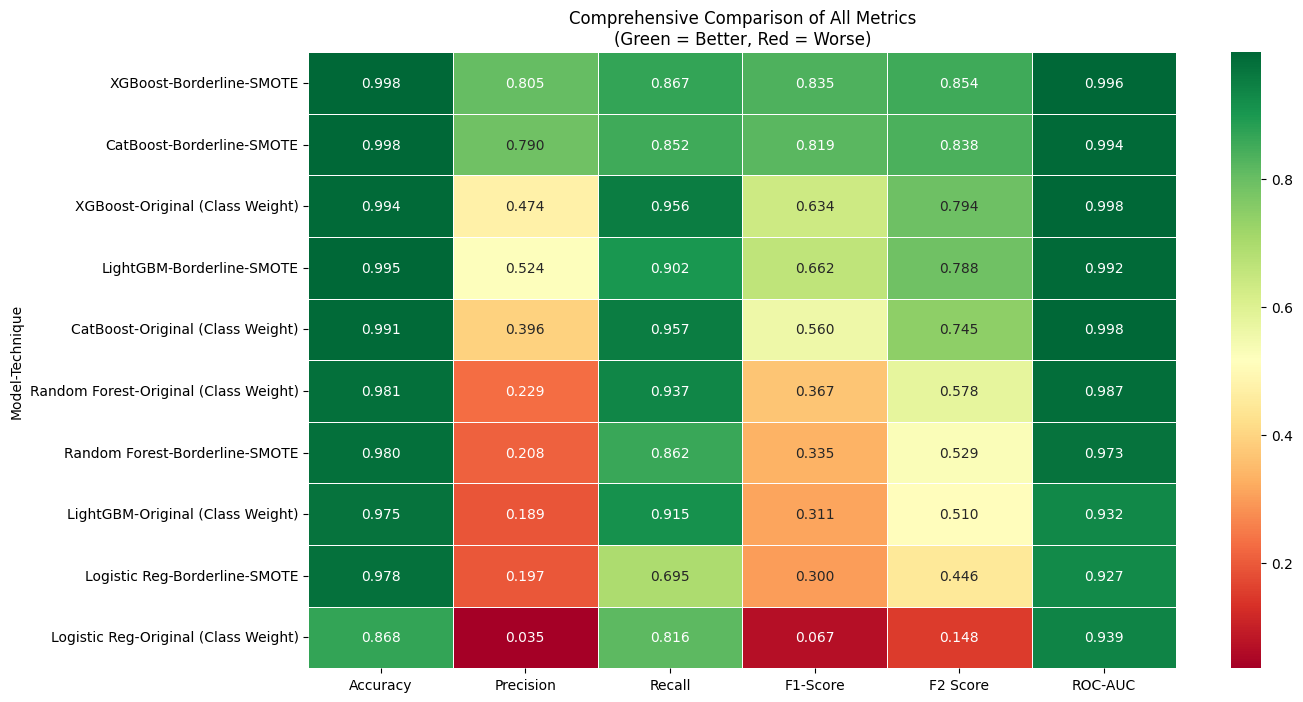

In [55]:
plt.figure(figsize=(14, 8))
df_results = pd.concat([data_org, data_smt], axis=0)
df_results = df_results.sort_values(by='F2 Score', ascending=False)
heatmap_data = df_results.set_index(['Model', 'Technique'])
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', fmt='.3f', linewidths=0.5)
plt.title('Comprehensive Comparison of All Metrics\n(Green = Better, Red = Worse)')
plt.show()

# **Save Model & Data**

In [56]:
CHOSEN_MODEL_NAME = "XGBoost"

print(f"Preparing model storage: {CHOSEN_MODEL_NAME}...")

final_model = None
final_model = models_original[CHOSEN_MODEL_NAME]

# IMPORTANT: Retrain on ALL training data
# (Previously, cross_validate only trained on some data per fold)
print("Retraining the entire X_train...")
final_model.fit(X_train, y_train)

# ==========================================
# SAVE TO FILE .PKL
# ==========================================
filename = f"fraud_detection_{CHOSEN_MODEL_NAME}_'Original'.pkl"

# We store it in dictionary form so that the column metadata is carried over.
model_package = {
    'model': final_model,
    'features': X_train.columns.tolist(), # Keep the column order!
    'target_names': ['Normal', 'Fraud']
}

joblib.dump(model_package, filename)

print("\n" + "="*40)
print(f"Success! The model has been saved to the file.: {filename}")
print("="*40)

Preparing model storage: XGBoost...
Retraining the entire X_train...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:07:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Success! The model has been saved to the file.: fraud_detection_XGBoost_'Original'.pkl


In [57]:
# ==========================================
# TEST LOADING MODEL
# ==========================================

# 1. Load file
loaded_package = joblib.load(filename)
loaded_model = loaded_package['model']
expected_cols = loaded_package['features']

print(f"The model was successfully loaded.: {type(loaded_model)}")
print(f"The model expects {len(expected_cols)} feature.")

# 2. Try Predicting with Test Data (X_test)
# Ensure that the order of the X_test columns matches what the model expects
X_test_ordered = X_test[expected_cols]

# Take the first 5 data points for testing.
sample_data = X_test_ordered.head(5)
prediction = loaded_model.predict(sample_data)
proba = loaded_model.predict_proba(sample_data)[:, 1]

print("\nFirst 5 Data Prediction Test Results:")
df_test_result = pd.DataFrame({
    'Actual': y_test.head(5).values,
    'Prediction': prediction,
    'Fraud Probability': proba
})
display(df_test_result)

The model was successfully loaded.: <class 'xgboost.sklearn.XGBClassifier'>
The model expects 51 feature.

First 5 Data Prediction Test Results:


,Actual,Prediction,Fraud Probability
0,0,0,0.0000
1,0,0,0.0113
2,0,0,0.0004
3,0,0,0.0001
4,0,0,0.0006


In [58]:
# Find the index where the original data is Fraud (Actual = 1)
fraud_indices = y_test[y_test == 1].index

# Take 5 examples of Fraud data
sample_fraud = X_test_ordered.loc[fraud_indices].head(5)
sample_actual = y_test.loc[fraud_indices].head(5)

# Tell the model to predict
pred_fraud = loaded_model.predict(sample_fraud)
prob_fraud = loaded_model.predict_proba(sample_fraud)[:, 1]

# Show Results
print("\n=== TESTING for DATA FRAUD ===")
df_fraud_test = pd.DataFrame({
    'Actual': sample_actual.values,
    'Prediction': pred_fraud,
    'Fraud Probability': prob_fraud
})

display(df_fraud_test)


=== TESTING for DATA FRAUD ===


,Actual,Prediction,Fraud Probability
0,1,0,0.0140
1,1,1,0.9999
2,1,1,0.9995
3,1,1,0.9797
4,1,1,0.9998
